# Table of Contents
1. Import libaries
2. Import data: ords_prods_cust_merge.pkl
3. Order Hour of Day Histogram
4. Customer Loyalty Bar Chart
5. Prices by Hour Of Day
6. EDA for Age and Number of Dependents - with line chart output
7. Scatterplot showing age and income relationships to assess spending power
8. Stacked bar charts showing ordering habits, age, and family status relationships
9. Export visualizations

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# define path

path = r'/users/stephenhelvig/documents/python projects/instacart basket analysis/'

In [3]:
# import latest data

df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

# Order Hour of Day Histogram

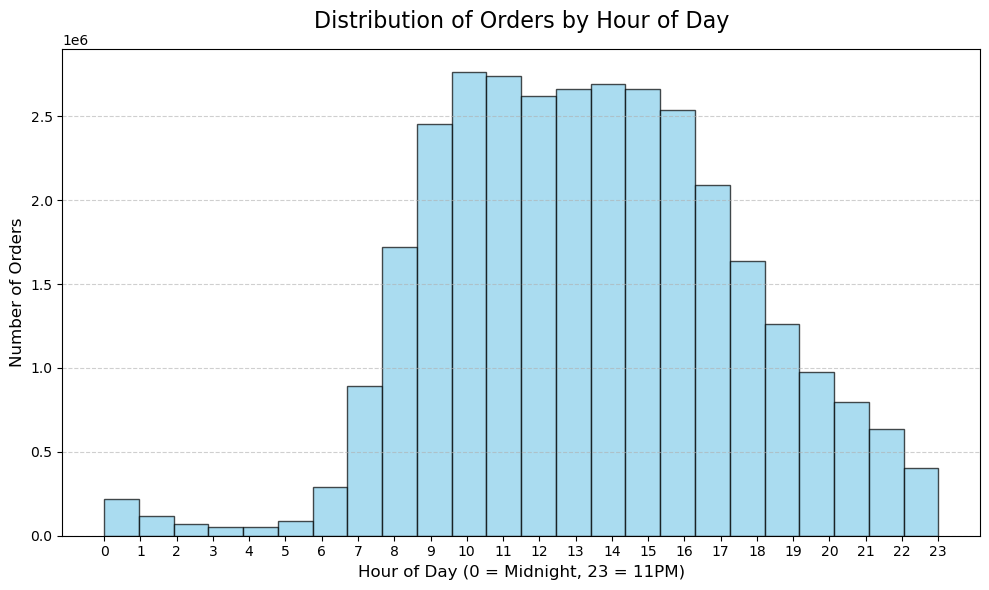

In [4]:
plt.figure(figsize=(10,6))
hist = df['order_hour_of_day'].plot.hist(
    bins=24,
    edgecolor='black',
    alpha=0.7,
    color='skyblue'
)

plt.title("Distribution of Orders by Hour of Day", fontsize=16, pad=15)
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)

plt.xticks(range(0, 24))  # every hour labeled
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

On the x axis we have each hour in a day and on the y axis we have the frequency of orders placed during each hour. The majority of orders are placed between 8am and 5pm. 

# Customer Loyalty Bar Chart

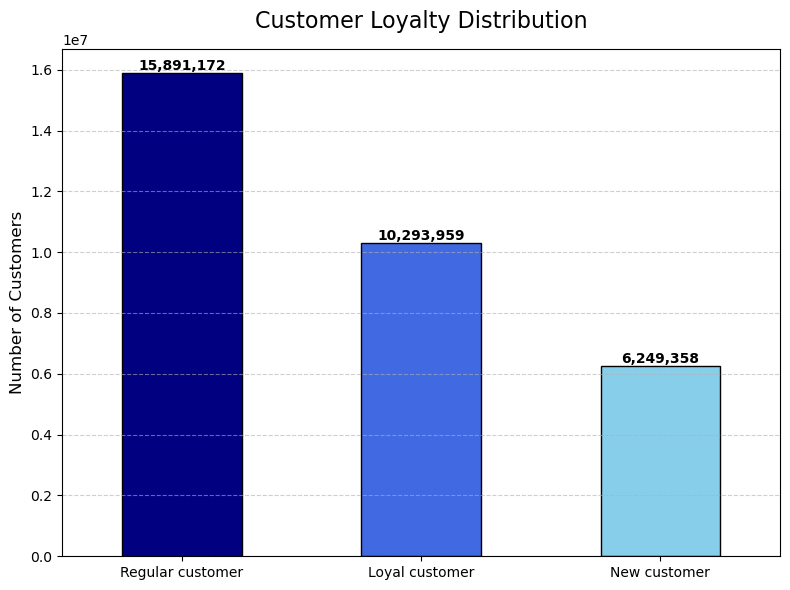

In [13]:
plt.figure(figsize=(8,6))
bar = df['loyalty_flag'].value_counts().plot.bar(
    color=['navy', 'royalblue', 'skyblue'],
    edgecolor='black'
)

plt.title("Customer Loyalty Distribution", fontsize=16, pad=15)
plt.ylabel("Number of Customers", fontsize=12)

# Remove x-axis label
bar.set_xlabel("")

# Add count labels above bars
for p in bar.patches:
    bar.annotate(
        f"{int(p.get_height()):,}",                # formatted count
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10, weight='bold'
    )

plt.xticks(rotation=0)  # keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Prices by Hour Of Day

In [16]:
# creating a sample set

np.random.seed(9)
dev = np.random.rand(len(df)) <= 0.7

In [17]:
# assigning 30% of dataset to 'small'

small = df[~dev]

In [18]:
# creating a new df_2 subset with only the columns needed for the line chart

df_2 = small[['order_hour_of_day', 'prices']]

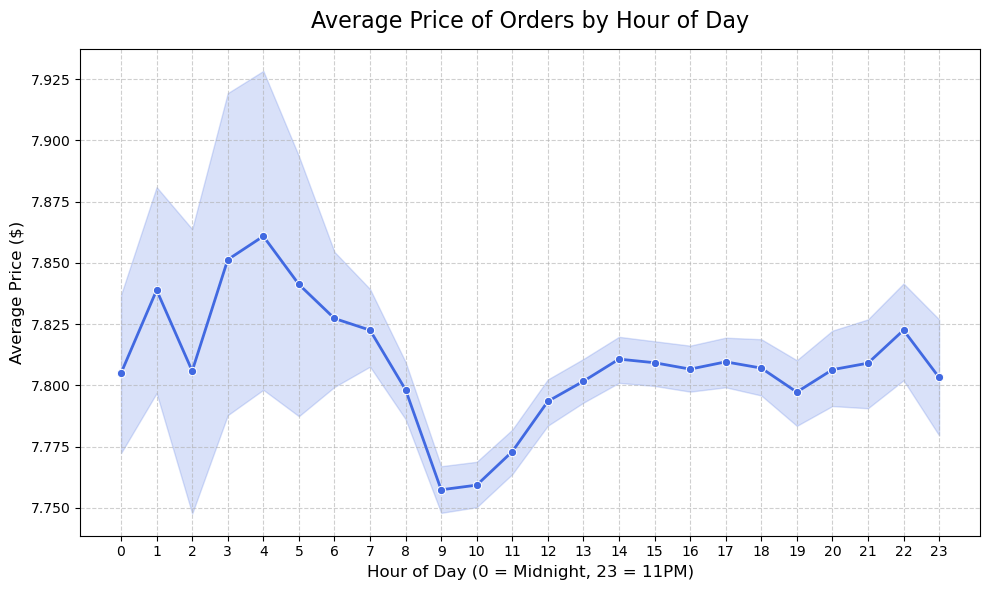

In [19]:
# creating a line chart for orders by hour of day

plt.figure(figsize=(10,6))

line = sns.lineplot(
    data=df_2,
    x='order_hour_of_day',
    y='prices',
    marker='o',          # dots on each hour
    linewidth=2,
    color='royalblue'
)

plt.title("Average Price of Orders by Hour of Day", fontsize=16, pad=15)
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)

plt.xticks(ticks=range(0,24,1))   # label every hour
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# EDA for Age and Number of Dependents

In [39]:
# creating a new subset with the columns needed for this analysis
df_3 = small[['age', 'number_of_dependents']]

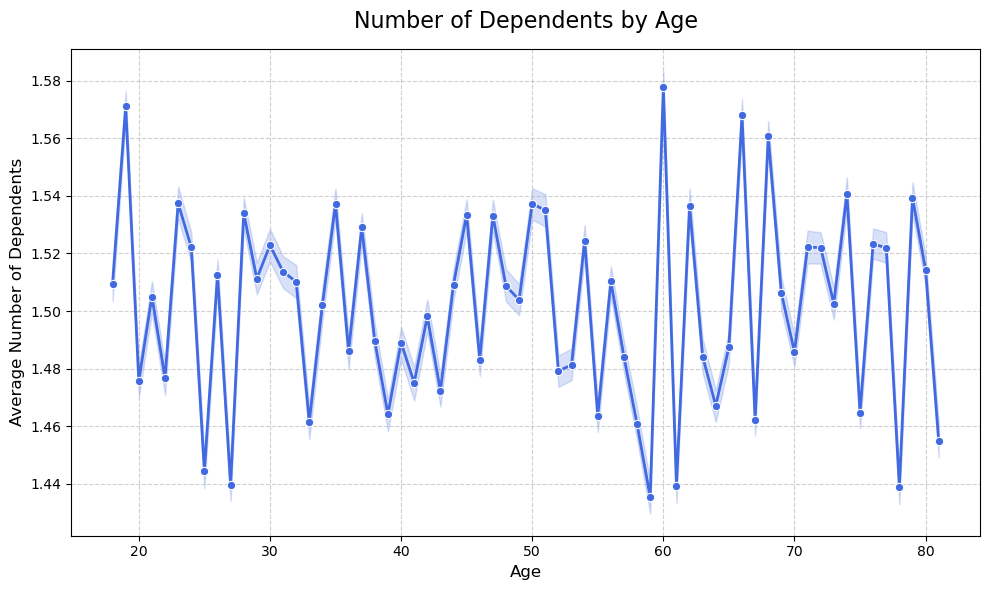

In [25]:
# creating a line chart with age on x axis and number of dependents on the y axis

plt.figure(figsize=(10,6))
line2 = sns.lineplot(
    data=df_3,
    x='age',
    y='number_of_dependents',
    marker='o',
    linewidth=2,
    color='royalblue'
)

plt.title("Number of Dependents by Age", fontsize=16, pad=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Number of Dependents", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

There doesn't seem to be any clear relationship between age and the number of dependents a customer has. 

# Scatterplot showing age and income relationships to assess spending power

In [29]:
# create a new subset with the columns needed for this analysis
df_4 = small[['user_id', 'age', 'income']]

In [30]:
df_4.shape

(9729464, 3)

In [31]:
# drop duplicates in df_4
df_4 = df_4.drop_duplicates()

In [32]:
df_4.shape

(205481, 3)

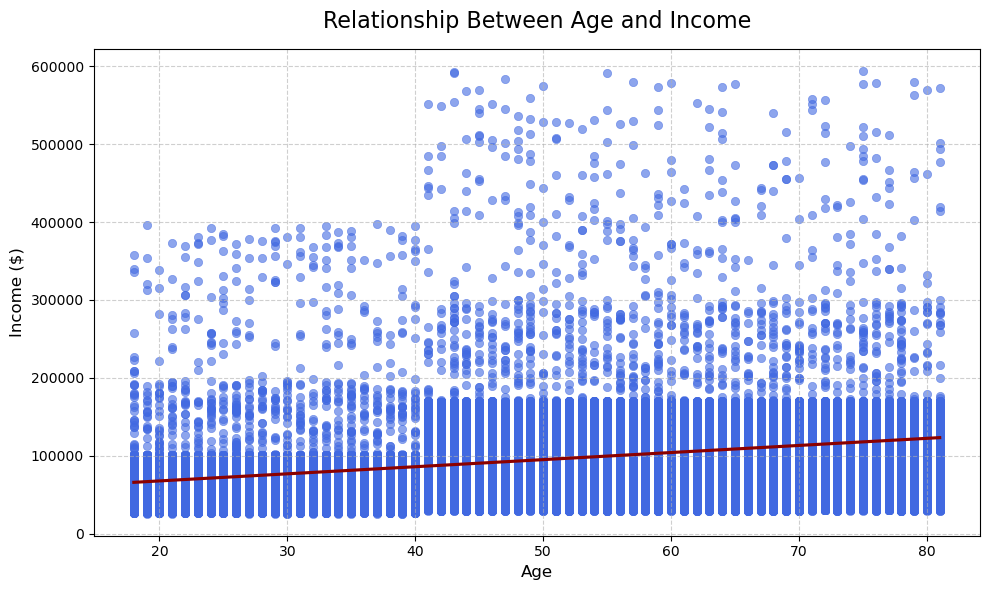

In [36]:
# create a scatterplot

plt.figure(figsize=(10,6))
spending_power = sns.scatterplot(
    data=df_4,
    x='age',
    y='income',
    alpha=0.6,          # transparency to reduce overlap
    color='royalblue',
    edgecolor=None
)

# Add a regression line to show trend
sns.regplot(
    data=df_4,
    x='age',
    y='income',
    scatter=False,      # line only
    color='darkred',
)

plt.title("Relationship Between Age and Income", fontsize=16, pad=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Income ($)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This scatterplot shows that the majority of incomes are 200,000 or less. But, as age increases, so do the frequency of incomes above 200,000. Therefore, the 40+ demographic has the most spending power. 

# Stacked bar charts showing ordering habits, age, and family status relationships

In [46]:
# creating a new subset with the columns needed for exploring age, family status, and ordering habits
df_5 = small[['user_id', 'age', 'family_status', 'avg_order_spending_flag']]

df_5 = df_5.drop_duplicates()

In [47]:
# Create age groups

df_5['age_group'] = pd.cut(
    df_5['age'],
    bins=[0,25,40,60,100],
    labels=['<25','25–39','40–59','60+']
)

avg_order_spending_flag  Avg order spender  High order spender  \
age_group                                                        
<25                                  41.31               12.57   
25–39                                40.94               12.79   
40–59                                41.31               12.66   
60+                                  41.41               12.52   

avg_order_spending_flag  Low order spender  
age_group                                   
<25                                  46.12  
25–39                                46.27  
40–59                                46.04  
60+                                  46.07  


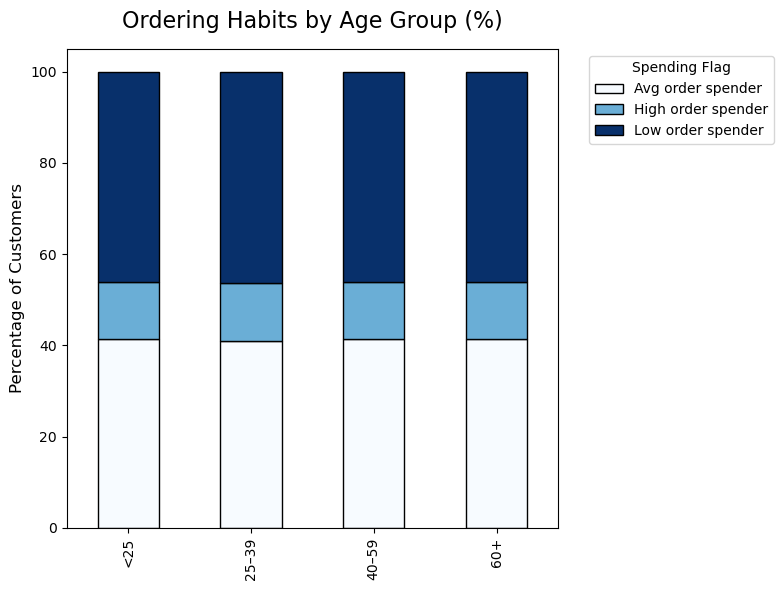

In [62]:
# Crosstab (normalized to %)
age_spending = pd.crosstab(
    df_5['age_group'], 
    df_5['avg_order_spending_flag'], 
    normalize='index'
) * 100

print(age_spending.round(2))  # table for reporting

# Visualization
age_spending.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    colormap='Blues',
    edgecolor='black'
)

plt.title("Ordering Habits by Age Group (%)", fontsize=16, pad=15)
plt.xlabel("")
plt.ylabel("Percentage of Customers", fontsize=12)
plt.legend(title="Spending Flag", bbox_to_anchor=(1.05,1))
plt.tight_layout()

# export
out_path = os.path.join(path, "Analysis", "Visualizations", "order_habits_age_group.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

avg_order_spending_flag           Avg order spender  High order spender  \
family_status                                                             
divorced/widowed                              41.09               12.67   
living with parents and siblings              41.22               12.90   
married                                       41.32               12.67   
single                                        41.06               12.38   

avg_order_spending_flag           Low order spender  
family_status                                        
divorced/widowed                              46.24  
living with parents and siblings              45.88  
married                                       46.00  
single                                        46.57  


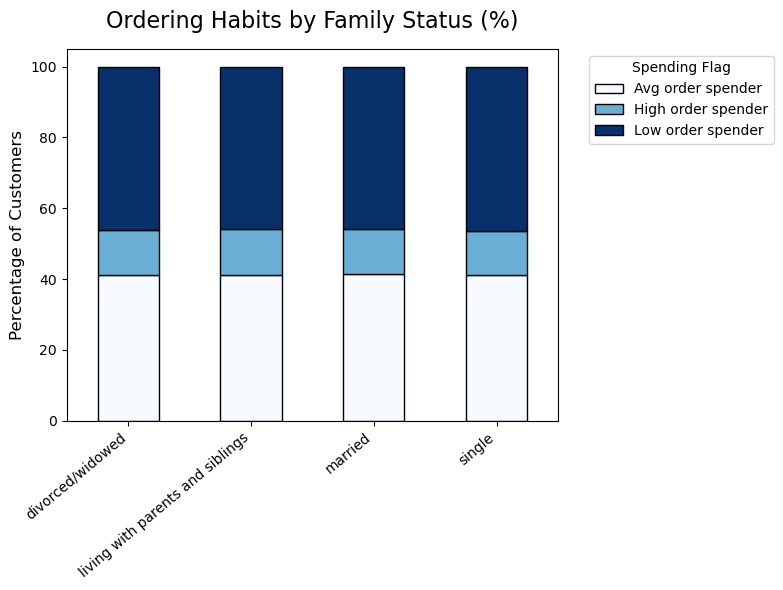

In [66]:
# Crosstab (normalized to %)
fam_spending = pd.crosstab(
    df_5['family_status'], 
    df_5['avg_order_spending_flag'], 
    normalize='index'
) * 100

print(fam_spending.round(2))  # table for reporting

# Visualization
fam_spending.plot(
    kind='bar',
    stacked=True,
    figsize=(8,6),
    colormap='Blues',
    edgecolor='black'
)

plt.title("Ordering Habits by Family Status (%)", fontsize=16, pad=15)
plt.xlabel("")
plt.ylabel("Percentage of Customers", fontsize=12)
plt.legend(title="Spending Flag", bbox_to_anchor=(1.05,1))
plt.xticks(rotation=40, ha='right')
plt.tight_layout()

# export
out_path = os.path.join(path, "Analysis", "Visualizations", "ordering_habits_family_status.png")
plt.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()

# Exporting Visualizations

In [9]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'hist_order_hour_of_day.png'), dpi=300, bbox_inches='tight')

In [14]:
bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_customer_loyalty.png'), dpi=300, bbox_inches='tight')

In [20]:
line.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_chart_prices_order_hour_of_day.png'), dpi=300, bbox_inches='tight')

In [27]:
line2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_chart_age_number_of_dependents.png'), dpi=300, bbox_inches='tight')

In [37]:
spending_power.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_age_income.png'), dpi=300, bbox_inches='tight')